In [1]:
import os
from sympy import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-paper")

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

## Canvas palette

Text(0, 0.5, 'YLABEL (unit)')

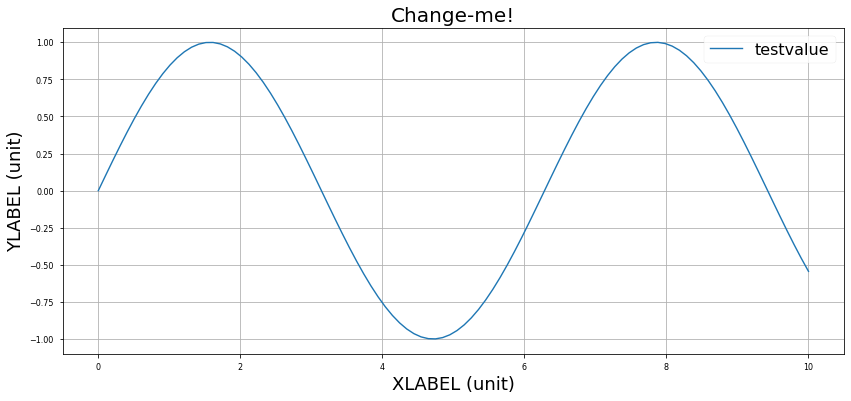

In [2]:
#Canvas for single plot
x = np.linspace(0,10,100)
y = np.sin(x)
plt.figure(figsize=[14,6])
plt.grid(True)
plt.title("Change-me!",fontsize=20)
plt.plot(x,y,label="testvalue")
plt.legend(fontsize=16)
plt.xlabel("XLABEL (unit)",fontsize=18)
plt.ylabel("YLABEL (unit)",fontsize=18)

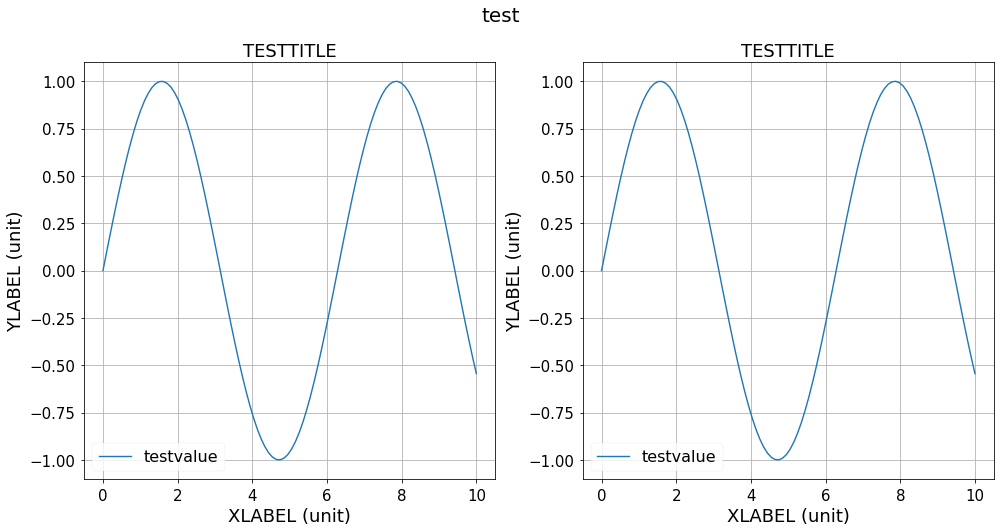

In [13]:
#Canvas for side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
fig.suptitle("test",y=1.05,fontsize=20)

axes[0].grid(True)
axes[0].plot(x,y,label="testvalue")
axes[0].legend(fontsize=16)
axes[0].set_title("TESTTITLE",fontsize=18)
axes[0].set_xlabel("XLABEL (unit)",fontsize=18)
axes[0].set_ylabel("YLABEL (unit)",fontsize=18)
axes[0].legend(fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=15)


axes[1].grid(True)
axes[1].plot(x,y,label="testvalue")
axes[1].legend(fontsize=16)
axes[1].set_title("TESTTITLE",fontsize=18)
axes[1].set_xlabel("XLABEL (unit)",fontsize=18)
axes[1].set_ylabel("YLABEL (unit)",fontsize=18)
axes[1].legend(fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=15)


fig.tight_layout()

## Read data

In [4]:
#Folder and paths definitions
main_path  = os.getcwd()
datafolder_path = main_path+"/results"
results_dir = "/output" 
output_dir = main_path+results_dir
try:
    os.mkdir(output_dir)
except OSError:
    print ("Creation of the directory %s failed" % results_dir)
else:
    print ("Successfully created the directory %s " % results_dir)


Creation of the directory /output failed


In [5]:
#Simulation parameters
N = 5000
T = 10000
n_runs = 20
dt = .01
freq = "gfreq"
MF = "MF"

In [34]:
#K for simulation
K_r0 = np.arange(0,1.6,.2) #da 0 a 1.4 a step di .2, note the last step is not included!
K_r1 = np.arange(1.41,2.01,.01)
K_r2 = np.arange(2.5,5.5,.5)
Kvalues = np.concatenate((K_r0,K_r1,K_r2))
Kvalues = np.unique(Kvalues, axis=0)
print(len(Kvalues))
Kvalues

74


array([0.  , 0.2 , 0.4 , 0.6 , 0.8 , 1.  , 1.2 , 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.5 , 3.  , 3.5 , 4.  , 4.5 , 5.  ])

In [7]:
#Create dataframe dictionary. For each entry, first value is the K of the dataframe (second value)
data = []
for i in range(0,len(Kvalues)):
    filename = datafolder_path + "/%s_uphase_N%d_%s_T%d_dt%.4f_nruns%d_K%.3f.tsv"%(freq,N,MF,T,dt,n_runs,Kvalues[i])
    #cols refers to timestep, avgmod, stdmod, avgphase,stdphase (of order parameter)
    df = pd.read_csv(filename,sep="\t",header=None)
    data.append([format(Kvalues[i],'.3f'),df])

## Plots

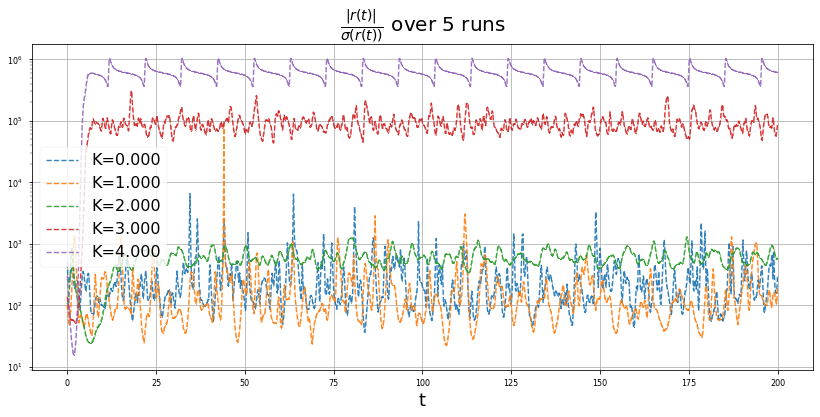

In [8]:
#Plot settings
alph = .9
tmax =150
#Useful for rapidly obtain wanted range for K
max_K_in_plot = 5
max_n_of_K_in_plot = 5
idx_max_K_in_plot = find_nearest(Kvalues,max_K_in_plot)

plt.figure(figsize=[14,6])
plt.grid(True)
plt.title("$\\frac{|r(t)|}{\\sigma(r(t))}$ over %d runs" % (n_runs),fontsize=20)
for i in range(0,idx_max_K_in_plot,int(idx_max_K_in_plot/max_n_of_K_in_plot)):
    plt.plot(data[i][1][0],data[i][1][1]/data[i][1][2],ls='--',marker='.',markersize=.5,label="K=%s"%(data[i][0]),alpha=alph)
plt.semilogy()
plt.legend(fontsize=16)
plt.xlabel("t",fontsize=18)
plt.show()

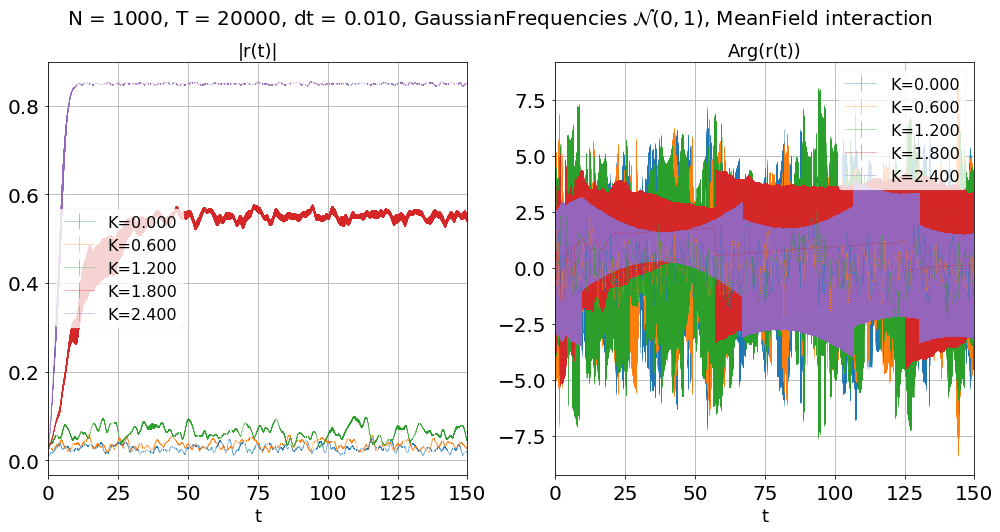

In [12]:
#Plot settings
alph = .9
tmax =150
#Useful for rapidly obtain wanted range for K
max_K_in_plot = 3
max_n_of_K_in_plot = 5
idx_max_K_in_plot = find_nearest(Kvalues,max_K_in_plot)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

if(freq =="gfreq"):
    freq_plot="GaussianFrequencies $\\mathcal{N}(0,1)$"
else:
    freq_plot="Uniformly distributed frequencies $\\in[-.5,.5]$"
if(MF =="MF"):
    MF_plot="MeanField interaction"
else:
    MF_plot="non-MeanField interaction"


fig.suptitle("N = %d, T = %d, dt = %.3f, %s, %s"%(N,T,dt,freq_plot,MF_plot),y=1.05,fontsize=20)

axes[0].grid(True)

for i in range(0,idx_max_K_in_plot,int(idx_max_K_in_plot/max_n_of_K_in_plot)):
    axes[0].errorbar(data[i][1][0],data[i][1][1],yerr=data[i][1][2],ls='--',linewidth=.5,fmt='.',markersize=.05, elinewidth=.5, capthick=.5,label="K=%s"%(data[i][0]),alpha=alph)
    axes[1].errorbar(data[i][1][0],data[i][1][3],yerr=data[i][1][4],ls='--',linewidth=.5,fmt='.',markersize=.05, elinewidth=.5, capthick=.5,label="K=%s"%(data[i][0]),alpha=alph)

axes[0].legend(fontsize=16)
axes[0].set_title("|r(t)|",fontsize=18)
axes[0].set_xlabel("t",fontsize=18)
axes[0].set_ylabel("",fontsize=18)
axes[0].legend(fontsize=16)
axes[0].set_xlim(0,tmax)
axes[0].tick_params(axis='both', which='major', labelsize=15)


axes[1].grid(True)
axes[1].legend(fontsize=16)
axes[1].set_title("Arg(r(t))",fontsize=18)
axes[1].set_xlabel("t",fontsize=18)
axes[1].set_ylabel("",fontsize=18)
axes[1].legend(fontsize=16)
axes[1].set_xlim(0,tmax)
axes[1].tick_params(axis='both', which='major', labelsize=15)

fig.tight_layout()